# 예측 애널리틱스 - 인공신경망 실습
* 2주차의 내용은 DNN 모델을 구축하는 것이고, 3주차의 내용은 CNN 모델을 구축하는 것이므로  
한 파일안에 DNN 과 CNN을 같이 작성하였음.

# 1. 데이터셋 불러오기 


In [1]:
# 모듈, 라이브러리 불러오기 
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout


In [2]:
#fashion_MNIST 불러오기 
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 데이터 확인
print('train 데이터 갯수: ', len(X_train))
print('test 데이터 갯수: ', len(X_test))


# print(X_train[0])
# print(y_train[0])
'''
X의 데이터 형식은 28*28 픽셀에 각 픽셀 강 0-255 값을 가지고 있는 데이터
y의 데이터 형식은 0-9의 값 중 하나. 의류 물품중 하나를 라벨링 한 값.

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

출처: http://www.gisdeveloper.co.kr/?p=7846
'''

4431872/4422102 [==============================] - 0s 0us/step
train 데이터 갯수:  60000
test 데이터 갯수:  10000


'\nX의 데이터 형식은 28*28 픽셀에 각 픽셀 강 0-255 값을 가지고 있는 데이터\ny의 데이터 형식은 0-9의 값 중 하나. 의류 물품중 하나를 라벨링 한 값.\n\nLabel\tDescription\n0\tT-shirt/top\n1\tTrouser\n2\tPullover\n3\tDress\n4\tCoat\n5\tSandal\n6\tShirt\n7\tSneaker\n8\tBag\n9\tAnkle boot\n\n출처: http://www.gisdeveloper.co.kr/?p=7846\n'

# 2. 데이터 전처리

* 데이터 형식: 28*28의 해상도에 각 셀당 0~255의 값을 가지고 있음.
* 0-255의 값을 0-1값으로 스케일링 하여 데이터를 전처리.

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# 데이터 재 확인 
# print(X_train[0])

# 3. 모델 생성

## 3-1. DNN


In [16]:
# 모델 생성
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),

  tf.keras.layers.Dense(units = 60, activation='relu'),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(units = 30, activation='relu'),
  tf.keras.layers.Dense(units = 10, activation='softmax')

])

#모델 컴파일러 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']
              
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 60)                47100     
                                                                 
 dropout_15 (Dropout)        (None, 60)                0         
                                                                 
 dense_11 (Dense)            (None, 30)                1830      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
Total params: 49,240
Trainable params: 49,240
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 모델 학습
history_DNN = model.fit(X_train, y_train, 
                    epochs = 25, 
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 2s 3ms/step - loss: 0.9317 - accuracy: 0.6701 - val_loss: 0.4980 - val_accuracy: 0.8270
Epoch 2/25
480/480 [==============================] - 2s 3ms/step - loss: 0.6071 - accuracy: 0.7858 - val_loss: 0.4647 - val_accuracy: 0.8401
Epoch 3/25
480/480 [==============================] - 2s 3ms/step - loss: 0.5466 - accuracy: 0.8051 - val_loss: 0.4305 - val_accuracy: 0.8465
Epoch 4/25
480/480 [==============================] - 1s 3ms/step - loss: 0.5219 - accuracy: 0.8109 - val_loss: 0.4344 - val_accuracy: 0.8448
Epoch 5/25
480/480 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.8204 - val_loss: 0.4056 - val_accuracy: 0.8503
Epoch 6/25
480/480 [==============================] - 1s 3ms/step - loss: 0.4805 - accuracy: 0.8265 - val_loss: 0.4094 - val_accuracy: 0.8522
Epoch 7/25
480/480 [==============================] - 1s 3ms/step - loss: 0.4719 - accuracy: 0.8284 - val_loss: 0.3888 - val_accuracy: 0.8608
Epoch 

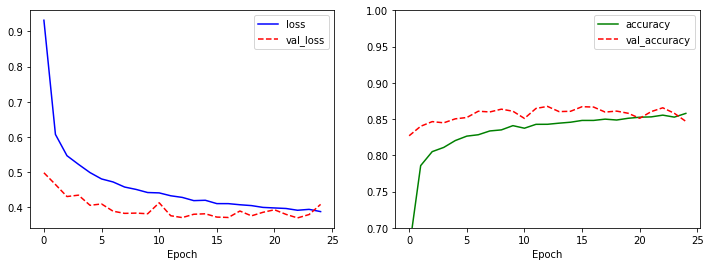

In [18]:
# 모델 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history_DNN.history['loss'], 'b-', label='loss')
plt.plot(history_DNN.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_DNN.history['accuracy'], 'g-', label='accuracy')
plt.plot(history_DNN.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

## 3-2. CNN


In [12]:
# 모델 생성
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Dropout(rate=0.4),

  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
  tf.keras.layers.MaxPool2D(strides=(2,2)),
  tf.keras.layers.Dropout(rate=0.4),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(units = 10, activation='softmax')

])

#모델 컴파일러 생성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']
              
)
# sparse_categorical_crossentropy를 사용하는 이유는?

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 5, 5, 128)        

In [13]:
# 모델 학습
history_CNN = model.fit(X_train, y_train, 
                    epochs = 25, 
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 4s 6ms/step - loss: 0.5596 - accuracy: 0.7966 - val_loss: 0.3647 - val_accuracy: 0.8679
Epoch 2/25
480/480 [==============================] - 3s 6ms/step - loss: 0.3752 - accuracy: 0.8634 - val_loss: 0.3443 - val_accuracy: 0.8707
Epoch 3/25
480/480 [==============================] - 3s 6ms/step - loss: 0.3341 - accuracy: 0.8773 - val_loss: 0.2969 - val_accuracy: 0.8896
Epoch 4/25
480/480 [==============================] - 3s 6ms/step - loss: 0.3067 - accuracy: 0.8862 - val_loss: 0.2953 - val_accuracy: 0.8928
Epoch 5/25
480/480 [==============================] - 3s 6ms/step - loss: 0.2846 - accuracy: 0.8944 - val_loss: 0.2912 - val_accuracy: 0.8932
Epoch 6/25
480/480 [==============================] - 3s 6ms/step - loss: 0.2714 - accuracy: 0.8987 - val_loss: 0.2744 - val_accuracy: 0.9008
Epoch 7/25
480/480 [==============================] - 3s 6ms/step - loss: 0.2559 - accuracy: 0.9045 - val_loss: 0.2703 - val_accuracy: 0.9062
Epoch 

* 초기 커널 수를 32-64-128로 설정했었을 때보다 64-128-256으로 설정했을때가 정확도가 소폭 상승하였음. 
* Dropout 비율을 0.5일때 :약 0.91, 0.4일때 약 0.94. 하지만 검증 데이터셋은 0.91에서 변경 X.

# 4. 모델 평가 및 그래프 확인

In [14]:
#모델을 test 데이터 셋에 넣어 정확도를 확인.
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.9128


[0.29600587487220764, 0.9128000140190125]

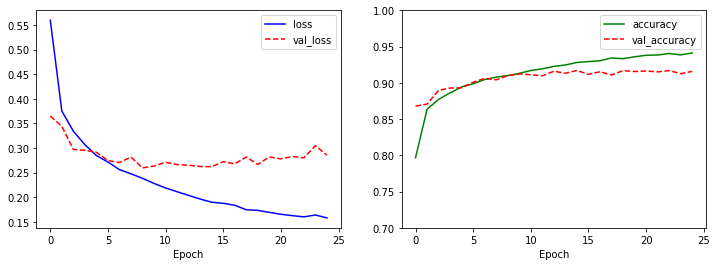

In [15]:
# 모델 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(history_CNN.history['loss'], 'b-', label='loss')
plt.plot(history_CNN.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_CNN.history['accuracy'], 'g-', label='accuracy')
plt.plot(history_CNN.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()